# Goal -
**Exploratory Forecasting of Air Pollution using Linear Regression**

**Q. What is Linear Regression?** <br>
**A. Linear Regression is a statistical method, used to model the relationship between a dependent variable and one or more independent variables.** (By a Linear Equation)

# Step 0 - Data Orientation
Importing Python libraries and reading data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('pollution_df.csv')
df.shape

(346, 8)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dew,346.0,-13.878613,4.029925,-27.00,-16.00,-14.000,-11.0000,-6.00
temp,346.0,-0.653179,4.548732,-9.00,-4.00,-1.500,2.0000,11.00
press,346.0,1026.083815,5.996272,1011.00,1022.00,1027.000,1031.0000,1035.00
wnd_spd,346.0,62.473815,107.500012,0.45,2.67,7.825,58.7825,441.18
snow,346.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
rain,346.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
pollution,346.0,96.398844,98.298524,0.00,14.00,63.500,157.5000,444.00


In [5]:
df.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


In [6]:
df['period'] = list(range(346))

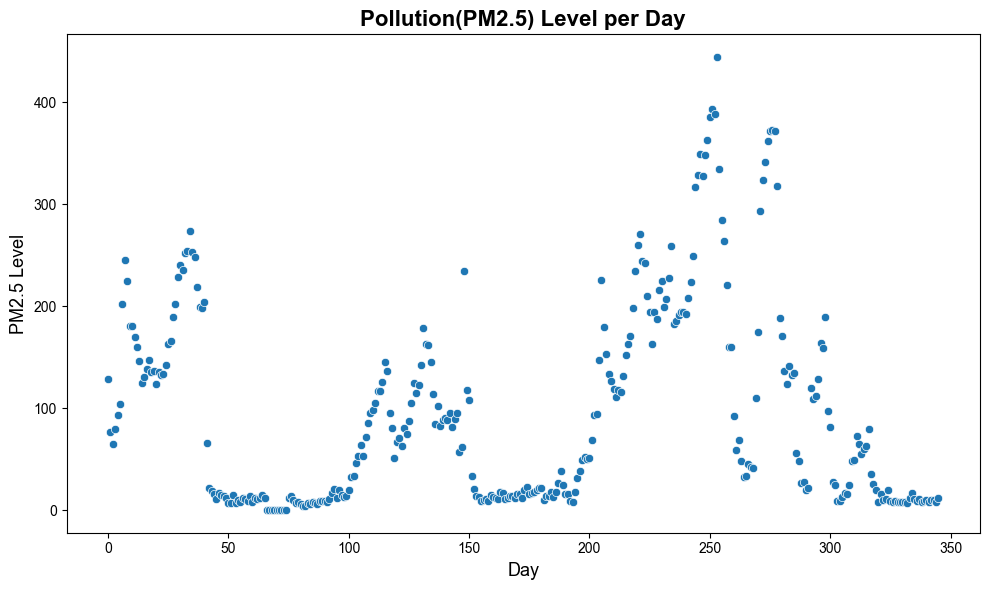

In [7]:
fig, ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data= df, x= df['period'], y= df['pollution'])
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
plt.title("Pollution(PM2.5) Level per Day", fontsize = 16, weight = 'bold')
plt.xlabel("Day", fontsize = 13)
plt.ylabel("PM2.5 Level", fontsize = 13)

plt.tight_layout()
plt.show()

## Observation
### The scatter plot shows highly noisy daily PM2.5 values with noticeable rises and falls over longer periods rather than a smooth linear trend.

In [8]:
x = df['period'].values.reshape(-1,1)
y = df['pollution'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)

print(regressor.coef_)
print(regressor.intercept_)

[[0.06812828]]
[84.64671586]


**Using linear regression to estimate the best-fit linear relationship between time (period) and pollution, represented by the slope (m) and intercept (b).**

## Hypothesizing another line
**Lets say, the pollution will increase 0.681 units every day and expect the pollution to be 90 at the beginning of the time frame --**

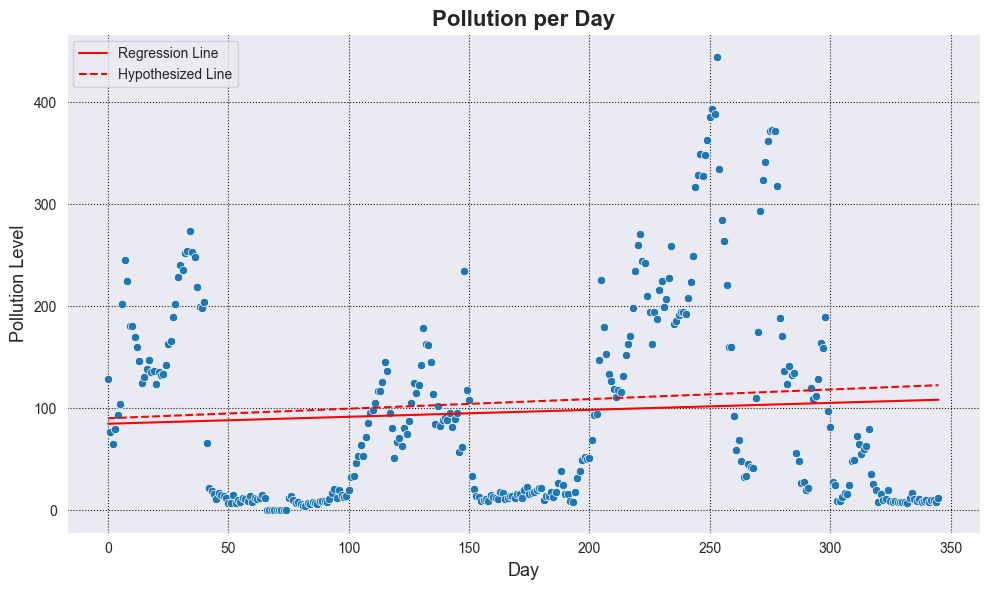

In [9]:
fig,ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data= df, x= df['period'], y = df['pollution'])
plt.plot(df['period'], [0.0681 * i + 84.64 for i in df['period']], 'r-', label = 'Regression Line')
plt.plot(df['period'], [0.0939 * i + 90 for i in df['period']], 'r--', label = 'Hypothesized Line')
plt.legend(loc = 'upper left')
plt.title('Pollution per Day', fontsize = 16, weight = 'bold')
plt.xlabel('Day', fontsize = 13)
plt.ylabel('Pollution Level', fontsize = 13)
plt.tight_layout()
plt.show()

**Both lines go through the data in a similar way. How do we determine the best line of Fit for our data**

In [10]:
pollution = df['pollution'].tolist()
regression_line = [0.0681 * i + 84.64 for i in df['period']]
hypothesized_line = [0.0939 * i + 90 for i in df['period']]

error_regression = [(x-y) for x,y in zip(regression_line, pollution)]
error_hypothesized = [(x-y) for x,y in zip(hypothesized_line, pollution)]

# print(error_regression) 
# print(error_hypothesized)

In [11]:
error_regressionabs = [abs(value) for value in error_regression]
error_hypothesizedabs = [abs(value) for value in error_hypothesized]

print(f"MAE of Regression Line: {np.mean(error_regressionabs)}")
print(f"MAE of Regression Line: {np.mean(error_hypothesizedabs)}")

MAE of Regression Line: 80.78866907514451
MAE of Regression Line: 82.92079566473987


In [12]:
error1_squared = [(value)**2 for value in error_regression]
error2_squared = [(value)**2 for value in error_hypothesized]
print(f"RMSE of Regression Line: {np.sqrt(np.mean(error1_squared))}")
print(f"RMSE of Hypothesized Line: {np.sqrt(np.mean(error2_squared))}")


RMSE of Regression Line: 97.92021776462032
RMSE of Hypothesized Line: 98.44294543912034


# Basic Interpretations 
**MAE:(Mean Absolute Error)| Average of the absolute differences between predicted and actual values.** (On average, how far are my predictions from the truth?) <br>
**RMSE:(Root Mean Squared Error)| Square root of the average of squared differences between predicted and actual values.** (How large are my errors with extra penalty on mistakes?) <br>

In [13]:
df_extended = np.append(df['period'], np.arange(346, 400))
df_extended_pred = df_extended.reshape(-1,1)

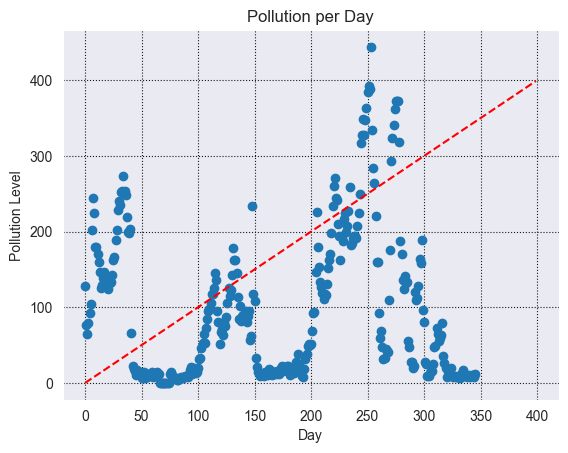

In [14]:
df_prediction = regressor.predict(df_extended_pred)
plt.scatter(df['period'], df['pollution'])
plt.plot(df_extended, df_extended_pred, 'r--')
plt.title('Pollution per Day')
plt.xlabel('Day')
plt.ylabel('Pollution Level')
plt.show()


## Observation
**The regression line indicates a continuous upward trend in pollution over time. However, the actual data exhibits a clear cyclical pattern with recurring peaks and troughs, suggesting that a simple linear model fails to capture the underlying seasonal behavior present in the data.**

In [15]:
def get_mae(line, actual):
    error = [(x-y) for x,y in zip(line,actual)]
    error_abs = [abs(value) for value in error]
    mae = np.mean(error_abs)
    return (mae)

def get_rmse(line,actual):
    error = [(x-y) for x,y in zip(line,actual)]
    error_sqrd = [(value)**2 for value in error]
    rmse = np.sqrt(np.mean(error_sqrd))
    return (rmse)

## More Regression Models


In [16]:
df.dtypes

dew            int64
temp           int64
press          int64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
pollution      int64
period         int64
dtype: object

In [17]:
df.columns

Index(['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain',
       'pollution', 'period'],
      dtype='object')

## Model Setup

**Since PM2.5 (pollution) levels cannot be explained using a single variable such as time alone, the model performs a multivariate analysis using additional available environmental variables such as dew point and temperature, along with time (period) to capture overall trends.**

In [18]:
x1 = df[['dew', 'temp', 'period']].values.reshape(-1,3)
y = df['pollution'].values.reshape(-1,1)

regressorx1 = LinearRegression()
regressorx1.fit(x1,y)

print(regressorx1.coef_)
print(regressorx1.intercept_)



[[16.81246424 -5.77672431  0.11209532]]
[306.62284552]


In [19]:
get_mae(df['pollution'], regressorx1.predict(x1))

np.float64(46.37553609000957)

In [20]:
get_rmse(df['pollution'], regressorx1.predict(x1))

np.float64(63.628753947473236)

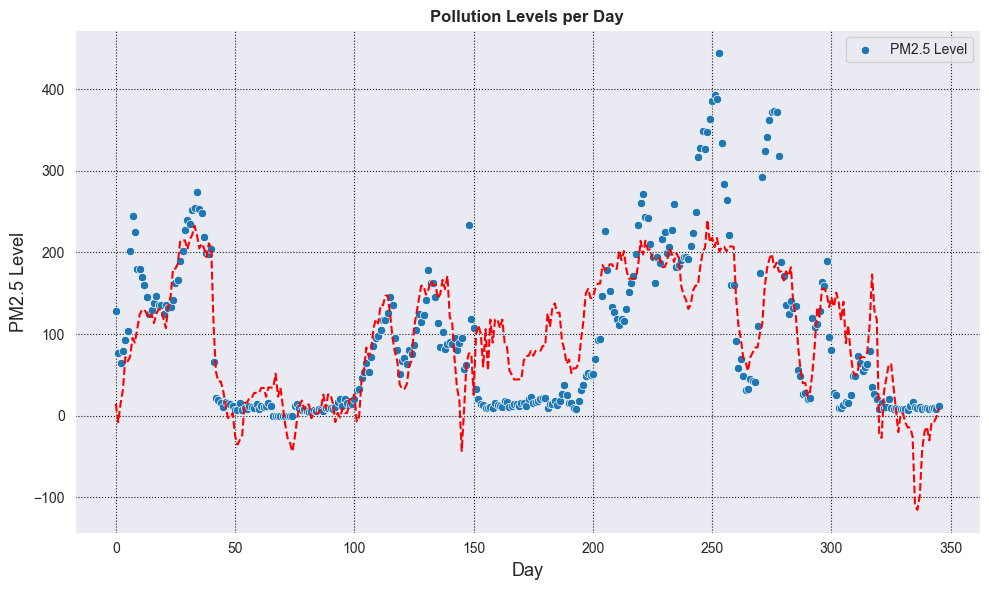

In [21]:
fig,ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data=df, x = df['period'], y = df['pollution'], label = "PM2.5 Level")
ax.plot(df['period'], regressorx1.predict(x1), 'r--')

plt.title("Pollution Levels per Day", weight = 'bold')
plt.xlabel("Day",fontsize = 13)
plt.ylabel("PM2.5 Level",fontsize = 13 )

plt.tight_layout()
plt.show()

## Model Interpretation

**The coefficients represent the expected change in pollution level for a one-unit change in each feature, while keeping all other variables constant.
The intercept represents a baseline pollution level when all input variables are zero and should be interpreted as a theoretical reference point.**

**A positive coefficient for time (period) suggests an overall increasing trend in pollution levels over the observed period.
A negative coefficient for temperature indicates that higher temperatures are generally associated with lower pollution levels in this dataset.**

## Model Performance

**MAE ≈ 46**

**RMSE ≈ 64**

**The higher RMSE compared to MAE indicates the presence of large errors on high-pollution days, suggesting that the model struggles to accurately capture extreme pollution values.**

## Visual Assessment

**The regression line captures a general upward trend in pollution levels over time. However, it fails to follow the clear cyclical and seasonal fluctuations visible in the data, indicating that trend alone is insufficient to explain daily pollution behavior.**

In [55]:
x2 = df[['dew', 'temp']].values.reshape(-1,2)
y = df['pollution'].values.reshape(-1,1)

regressorx2 = LinearRegression()
regressorx2.fit(x2,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
get_mae(df['pollution'], regressorx2.predict(x2))

np.float64(47.17414810057645)

In [24]:
get_rmse(df['pollution'], regressorx2.predict(x2))

np.float64(64.578595495348)

## Observation
**Removing time from the model results in nearly unchanged error metrics, indicating that temporal trends are largely captured indirectly through environmental variables rather than time itself.**

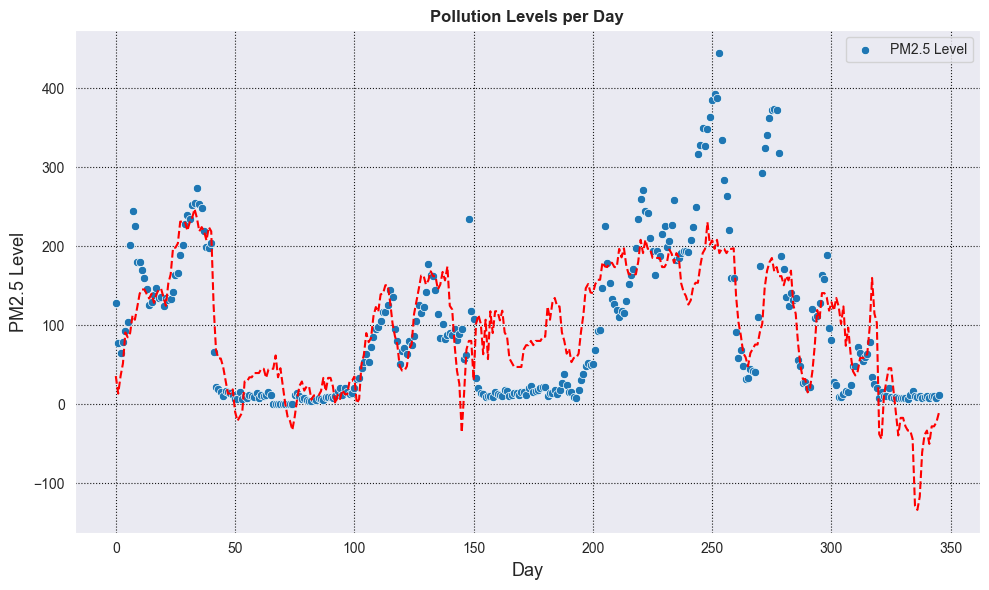

In [53]:
fig,ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data=df, x = df['period'], y = df['pollution'], label = "PM2.5 Level")
ax.plot(df['period'], regressorx2.predict(x2), 'r--')

plt.title("Pollution Levels per Day", weight = 'bold')
plt.xlabel("Day",fontsize = 13)
plt.ylabel("PM2.5 Level",fontsize = 13 )

plt.tight_layout()
plt.show()


In [59]:
x3 = df[['dew', 'temp', 'wnd_spd']].values.reshape(-1,3)
regressor_x3 = LinearRegression()
regressor_x3.fit(x3, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
get_mae(df['pollution'], regressor_x3.predict(x3))

np.float64(47.07779836969616)

In [58]:
get_rmse(df['pollution'], regressor_x3.predict(x3))

np.float64(64.56920769129871)

## Model Understanding
**Variables Used : 'dew', 'temp', 'wnd_spd'**

### Why this model was tested:
**Since the time variable (period) showed only a marginal contribution to reducing prediction error, this model introduces an additional meteorological feature (wnd_spd) to evaluate whether wind intensity alone helps explain variations in PM2.5 levels.**

### Model Performance:
**MAE ≈ 47** <br>
**RMSE ≈ 65** <br>
The error metrics remain largely unchanged compared to previous models.

### Takeaway:
**Wind speed by itself does not significantly improve model performance. This suggests that wind speed alone lacks directional context, and its impact on pollution dispersion likely depends on wind direction, not just magnitude. To extract meaningful signal from wind-related features, directional components (e.g., sine/cosine of wind direction) may be required.**

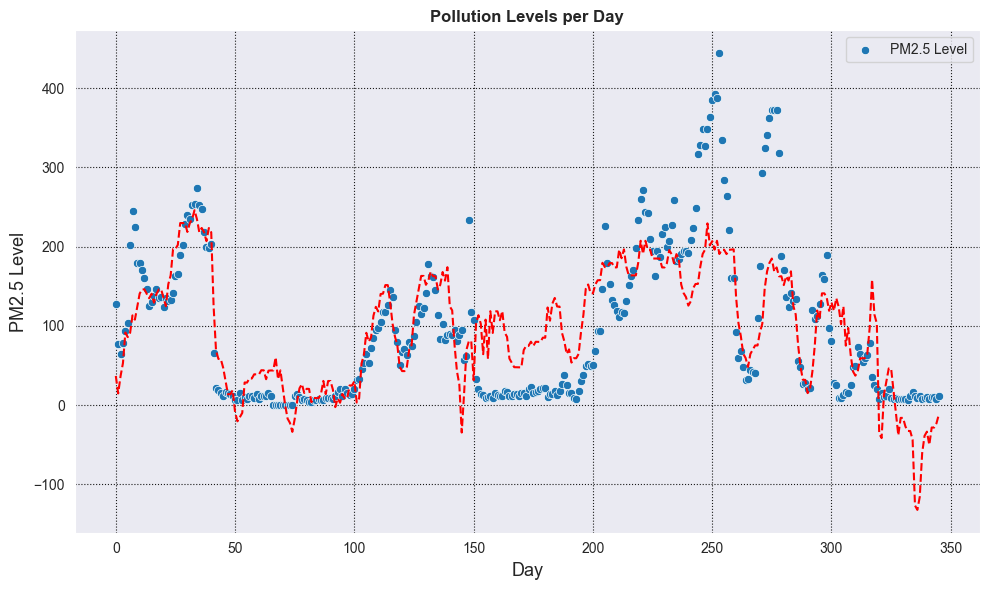

In [60]:
fig,ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data=df, x = df['period'], y = df['pollution'], label = "PM2.5 Level")
ax.plot(df['period'], regressor_x3.predict(x3), 'r--')

plt.title("Pollution Levels per Day", weight = 'bold')
plt.xlabel("Day",fontsize = 13)
plt.ylabel("PM2.5 Level",fontsize = 13 )

plt.tight_layout()
plt.show()

In [29]:
df['wnd_dir'].unique()

array(['SE', 'cv', 'NE', 'NW'], dtype=object)

In [31]:
direction_to_degrees = {
    'NE': 45,
    'SE': 135,
    'NW': 315
}
df['wnd_angle'] = df['wnd_dir'].map(direction_to_degrees)
df['wnd_rad'] = np.deg2rad(df['wnd_angle'])

        

In [32]:
df['wnd_sin'] = np.sin(df['wnd_rad'])
df['wnd_cos'] = np.cos(df['wnd_rad'])
df[['wnd_sin', 'wnd_cos']] = df[['wnd_sin', 'wnd_cos']].fillna(0)

In [35]:
df['period_sq'] = [x**2 for x in df['period']]

In [36]:
x5 = df[['dew', 'temp', 'wnd_spd', 'wnd_sin', 'wnd_cos', 'period', 'period_sq']].values.reshape(-1,7)
y = df['pollution'].values.reshape(-1,1)

regressor_x5 = LinearRegression()
regressor_x5.fit(x5, y)


np.float64(42.52540271977385)

In [63]:
get_mae(df['pollution'], regressor_x5.predict(x5))

np.float64(42.52540271977385)

In [37]:
get_rmse(df['pollution'], regressor_x5.predict(x5))

np.float64(60.180105847536524)

## Model Understanding

### Variables used:
**dew, temp, wnd_spd, wnd_sin, wnd_cos, period, period_sq**

### Why this model was tested
**This model extends the previous setups by combining meteorological factors with time-based components. Wind is now represented as a vector using sine and cosine transformations, while time is modeled both linearly (period) and non-linearly (period_sq) to capture possible long-term and curved trends. The goal is to evaluate whether adding directional wind information and temporal structure improves predictive performance.**

### Model Performance

**MAE ≈ 42.5** <br>
**RMSE ≈ 60.2** <br>
Both metrics show a noticeable improvement compared to earlier models, indicating better overall fit.

### Takeaway
**Including wind direction (via sine and cosine) and a non-linear time component reduces prediction error, suggesting that pollution levels are influenced by directional wind patterns and non-linear temporal effects, not just raw meteorological values. While the model still does not fully capture sharp pollution spikes, it represents a meaningful improvement over simpler linear and partially multivariate models.**

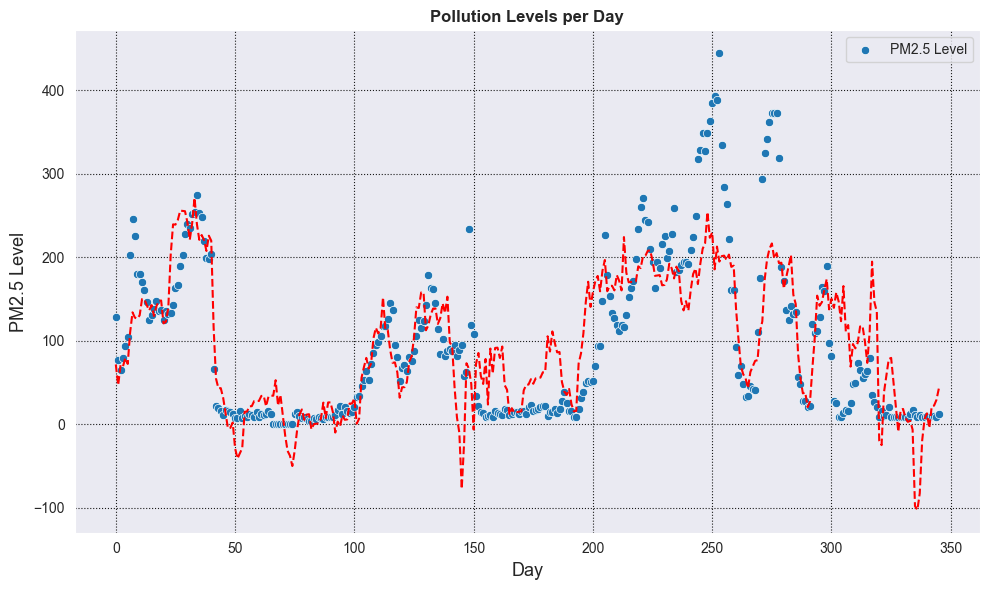

In [64]:
fig,ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data=df, x = df['period'], y = df['pollution'], label = "PM2.5 Level")
ax.plot(df['period'], regressor_x5.predict(x5), 'r--')

plt.title("Pollution Levels per Day", weight = 'bold')
plt.xlabel("Day",fontsize = 13)
plt.ylabel("PM2.5 Level",fontsize = 13 )

plt.tight_layout()
plt.show()

In [39]:
df['pollution_lag1'] = df['pollution'].shift(1)
df_lag = df.dropna(subset=['pollution_lag1'])

In [41]:
x8 = df_lag[['dew', 'temp', 'wnd_spd', 'wnd_sin', 'wnd_cos', 'period', 'period_sq', 'pollution_lag1']].values.reshape(-1,8)
y = df_lag['pollution'].values.reshape(-1,1)
regressor_x8 = LinearRegression()
regressor_x8.fit(x8, y)

get_mae(df_lag['pollution'], regressor_x8.predict(x8))

np.float64(14.824486827772626)

In [42]:
get_rmse(df_lag['pollution'], regressor_x8.predict(x8))

np.float64(25.64180380685792)

## Model Understanding (Lag-Based Model)

### Variables used
**dew, temp, wnd_spd, wnd_sin, wnd_cos, period, period_sq, pollution_lag1**

### Why this model was tested
**This model introduces lagged pollution (pollution_lag1) to capture temporal dependence — the idea that today’s pollution level is strongly influenced by yesterday’s level. Unlike previous models that relied only on external or time-derived features, this setup allows the model to directly learn short-term persistence in pollution behavior, which is common in environmental time series.**

### Model Performance

**MAE ≈ 14.8** <br>
**RMSE ≈ 25.6** <br>
These errors are significantly lower than all previous models, indicating a much stronger fit.

### Takeaway
**The sharp improvement confirms that recent historical pollution is the most informative predictor for short-term forecasting. This suggests that pollution levels exhibit strong autocorrelation, where conditions persist across consecutive days. Meteorological and time-based features still provide context, but lagged pollution dominates predictive accuracy.**

### Visual Assessment
**The regression curve closely follows the actual pollution values, capturing both rises and declines far more accurately than earlier models. While extreme peaks are still slightly smoothed, the model reflects day-to-day variation much more realistically.**

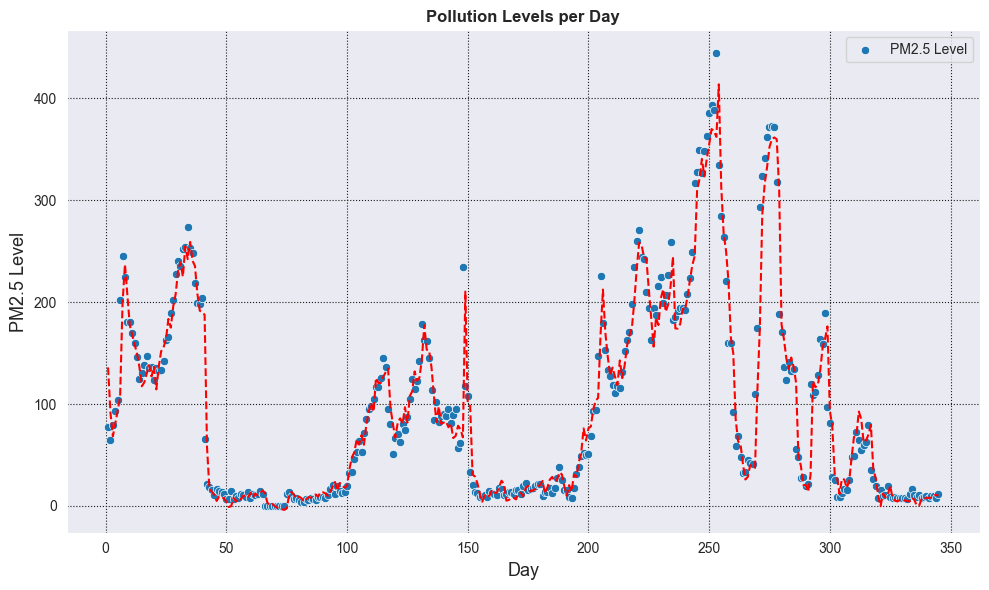

In [66]:
fig,ax = plt.subplots(figsize= (10,6))
sns.scatterplot(data=df_lag, x = df_lag['period'], y = df_lag['pollution'], label = "PM2.5 Level")
ax.plot(df_lag['period'], regressor_x8.predict(x8), 'r--')

plt.title("Pollution Levels per Day", weight = 'bold')
plt.xlabel("Day",fontsize = 13)
plt.ylabel("PM2.5 Level",fontsize = 13 )

plt.tight_layout()
plt.show()

In [71]:
x_train = df_lag.loc[0:255, ['dew', 'temp', 'wnd_spd', 'wnd_sin', 'wnd_cos', 'period', 'period_sq', 'pollution_lag1']].values.reshape(-1,8)
y_train = df_lag.loc[0:255, 'pollution'].values.reshape(-1,1)

x_test = df_lag.loc[256:345, ['dew', 'temp', 'wnd_spd', 'wnd_sin', 'wnd_cos', 'period', 'period_sq', 'pollution_lag1']].to_numpy()

In [79]:
regressor_final = LinearRegression()
regressor_final.fit(x_train, y_train)
complex_test_preds = [prediction for sublist in regressor_final.predict(x_test) for prediction in sublist]

In [74]:
pollution_level = df_lag['pollution']
print(pollution_level)

1       77
2       65
3       79
4       93
5      104
      ... 
341      8
342     10
343     10
344      8
345     12
Name: pollution, Length: 345, dtype: int64


In [73]:
get_rmse(complex_test_preds, pollution_level[256:345])

np.float64(63.16837613853399)

In [48]:
get_mae(complex_test_preds, pollution_level[256:345])

np.float64(52.792835019146814)

In [49]:
features = ['dew','temp','wnd_spd','wnd_sin','wnd_cos',
            'period','period_sq','pollution_lag1']

x_train = df_lag.iloc[:255][features].to_numpy()
y_train = df_lag.iloc[:255]['pollution'].to_numpy()

x_test  = df_lag.iloc[255:][features].to_numpy()
y_test  = df_lag.iloc[255:]['pollution'].to_numpy()

In [50]:
y_pred = regressor_final.predict(x_test)

In [51]:
get_rmse(y_test, y_pred)

np.float64(47.092467541121046)

In [52]:
get_mae(y_test, y_pred)

np.float64(41.192282634440005)